### matplotlib.pyplot
* 데이터 시각화를 위해 필요한 라이브러리

### FinanceDataReader
* 주식데이터가 들어있는 라이브러리

### numpy
* 계산을 위해 사용

In [2]:
import warnings
import tensorflow as tf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [88]:
data = fdr.DataReader('005930')
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-07-22,1079,1107,1070,1082,858010,NaN
1998-07-23,1096,1109,986,987,711860,-0.087800
1998-07-24,986,1003,908,961,864250,-0.026342
1998-07-25,847,930,847,847,860060,-0.118626
1998-07-27,809,847,791,829,918890,-0.021251
...,...,...,...,...,...,...
2022-10-05,56900,57200,55400,56000,22458970,0.014493
2022-10-06,56700,57300,56300,56300,14944446,0.005357
2022-10-07,55900,56900,55200,56200,16886813,-0.001776


In [98]:
# 종가(Close)만 사용할 것이기 때문에 종가만 추출
close = data['Close']

# 주식 가격의 비교 기준 구간 설정
start_data='2022-08-01'
end_data='2022-10-13'

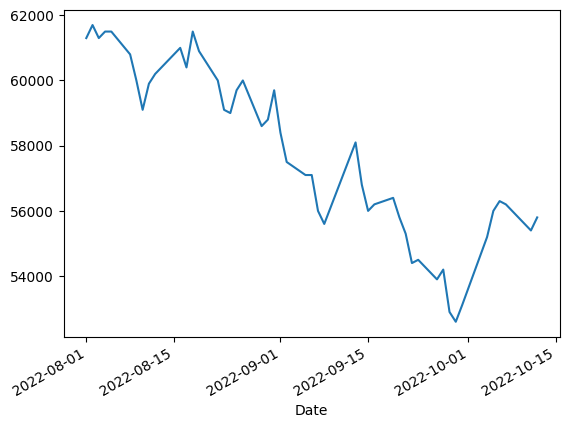

In [99]:
# 기준 구간 시계열 차트
close[start_data:end_data].plot();

In [100]:
#기준점이 되는 종가의 범위부분을 변수에 담음
base = close[start_data:end_data]
base

Date
2022-08-01    61300
2022-08-02    61700
2022-08-03    61300
2022-08-04    61500
2022-08-05    61500
2022-08-08    60800
2022-08-09    60000
2022-08-10    59100
2022-08-11    59900
2022-08-12    60200
2022-08-16    61000
2022-08-17    60400
2022-08-18    61500
2022-08-19    60900
2022-08-22    60000
2022-08-23    59100
2022-08-24    59000
2022-08-25    59700
2022-08-26    60000
2022-08-29    58600
2022-08-30    58800
2022-08-31    59700
2022-09-01    58400
2022-09-02    57500
2022-09-05    57100
2022-09-06    57100
2022-09-07    56000
2022-09-08    55600
2022-09-13    58100
2022-09-14    56800
2022-09-15    56000
2022-09-16    56200
2022-09-19    56400
2022-09-20    55800
2022-09-21    55300
2022-09-22    54400
2022-09-23    54500
2022-09-26    53900
2022-09-27    54200
2022-09-28    52900
2022-09-29    52600
2022-09-30    53100
2022-10-04    55200
2022-10-05    56000
2022-10-06    56300
2022-10-07    56200
2022-10-11    55400
2022-10-12    55800
Name: Close, dtype: int64

In [101]:
#핵심부분으로 정규화를 통하여 모든 값의 수를 0과 1 사이의 값을 가지도록 설정하였다
base_norm = (base - base.min()) / (base.max() - base.min())
base_norm

Date
2022-08-01    0.956044
2022-08-02    1.000000
2022-08-03    0.956044
2022-08-04    0.978022
2022-08-05    0.978022
2022-08-08    0.901099
2022-08-09    0.813187
2022-08-10    0.714286
2022-08-11    0.802198
2022-08-12    0.835165
2022-08-16    0.923077
2022-08-17    0.857143
2022-08-18    0.978022
2022-08-19    0.912088
2022-08-22    0.813187
2022-08-23    0.714286
2022-08-24    0.703297
2022-08-25    0.780220
2022-08-26    0.813187
2022-08-29    0.659341
2022-08-30    0.681319
2022-08-31    0.780220
2022-09-01    0.637363
2022-09-02    0.538462
2022-09-05    0.494505
2022-09-06    0.494505
2022-09-07    0.373626
2022-09-08    0.329670
2022-09-13    0.604396
2022-09-14    0.461538
2022-09-15    0.373626
2022-09-16    0.395604
2022-09-19    0.417582
2022-09-20    0.351648
2022-09-21    0.296703
2022-09-22    0.197802
2022-09-23    0.208791
2022-09-26    0.142857
2022-09-27    0.175824
2022-09-28    0.032967
2022-09-29    0.000000
2022-09-30    0.054945
2022-10-04    0.285714
2022-1

In [102]:
# 윈도우 사이즈: 내가 사용하는 pattern의 길이로 사용하는 데이터를 몇일치 볼 것 인지 나타낸다.
window_size = len(base)

# 예측 기간: 예측되는 기간의 길이
next_data = 10

# 검색 횟수: 계속 반복을 진행하며 전체 기록에서 내가 가지고 있는 패턴을 비교
moving_cnt = len(close) - window_size - next_data - 1

In [103]:
# 검색 횟수의 패턴과 윈도우 사이즈 패턴의 코사인 유사도를 검색
#  1에 가까울수록 유사도가 높고 0에 가까울수록 유사도가 낮다
def cosine_smilarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y,y)))

In [104]:
# 유사도 저장 딕셔너리
sim_list = []

for i in range(moving_cnt):
    target = close[i:i+window_size]
    
    # Normalize
    target_norm = (target - target.min()) / (target.max() - target.min())
    
    # 코사인 유사도 저장
    cos_similarity = cosine_smilarity(base_norm, target_norm)
    
    # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장
    sim_list.append(cos_similarity)

In [105]:
pd.Series(sim_list).sort_values(ascending=False).head(20)

1930    0.986645
2438    0.984788
1929    0.984301
1099    0.983874
1931    0.983555
2910    0.983377
5847    0.983225
2437    0.982892
2909    0.982441
1098    0.981798
5846    0.981285
5848    0.981138
4211    0.980320
4782    0.979933
5849    0.979721
1928    0.979548
4781    0.979259
2439    0.979187
2436    0.979003
4210    0.978906
dtype: float64

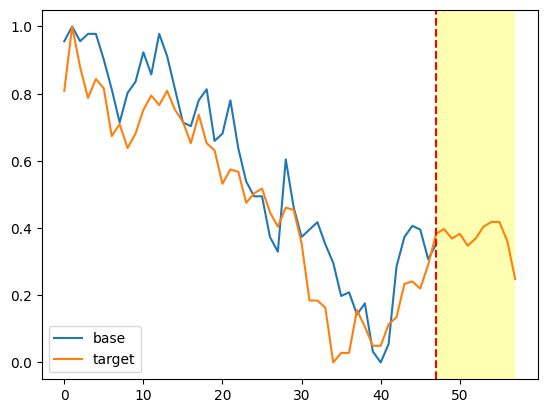

In [106]:
idx= 1930

top_= close[idx:idx+window_size+next_data]
top_norm= (top_ - top_.min()) / (top_.max() - top_.min())

plt.plot(base_norm.values, label='base')
plt.plot(top_norm.values, label='target')
plt.axvline(x=len(base_norm)-1, c='r', linestyle='--')
plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
plt.legend()
plt.show()

In [112]:
class PatternFinder():
    def __init__(self, period=5):
        self.period = period
    
    def set_stock(self, code: str):
        self.code = code
        self.data = fdr.DataReader(code)
        self.close = self.data['Close']
        self.change = self.data['Change']
        return self.data
        
    def search(self, start_date, end_date, threshold=0.98):
        base = self.close[start_date:end_date]
        self.base_norm = (base - base.min()) / (base.max() - base.min())
        self.base = base
        
        display(base)
        
        window_size = len(base)
        moving_cnt = len(self.data) - window_size - self.period - 1
        cos_sims = self.__cosine_sims(moving_cnt, window_size)
        
        self.window_size = window_size
        cos_sims = cos_sims[cos_sims > threshold]
        return cos_sims
    
    
    def __cosine_sims(self, moving_cnt, window_size):
        def cosine_similarity(x, y):
            return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))
        
        # 유사도 저장 딕셔너리
        sim_list = []

        for i in range(moving_cnt):
            target = self.close[i:i+window_size]

            # Normalize
            target_norm = (target - target.min()) / (target.max() - target.min())

            # 코사인 유사도 저장
            cos_similarity = cosine_similarity(self.base_norm, target_norm)

            # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장
            sim_list.append(cos_similarity)
        return pd.Series(sim_list).sort_values(ascending=False)

    
    def plot_pattern(self, idx, period=5):
        if period != self.period:
            self.period = period
            
        top = self.close[idx:idx+self.window_size+period]
        top_norm = (top - top.min()) / (top.max() - top.min())

        plt.plot(self.base_norm.values, label='base')
        plt.plot(top_norm.values, label='target')
        plt.axvline(x=len(self.base_norm)-1, c='r', linestyle='--')
        plt.axvspan(len(self.base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
        plt.legend()
        plt.show()
        
        
        preds = self.change[idx+self.window_size: idx+self.window_size+period]
        display(preds)
        print(f'pred: {preds.mean()*100} % ')

    
    def stat_prediction(self, result, period=5):
        idx_list = list(result.keys())
        mean_list = []
        for idx in idx_list:
            pred = self.change[idx+self.window_size: idx+self.window_size+period]
            mean_list.append(pred.mean())
        return np.array(mean_list)

In [113]:
p = PatternFinder()

In [114]:
p.set_stock('005930')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-07-22,1079,1107,1070,1082,858010,NaN
1998-07-23,1096,1109,986,987,711860,-0.087800
1998-07-24,986,1003,908,961,864250,-0.026342
1998-07-25,847,930,847,847,860060,-0.118626
1998-07-27,809,847,791,829,918890,-0.021251
...,...,...,...,...,...,...
2022-10-05,56900,57200,55400,56000,22458970,0.014493
2022-10-06,56700,57300,56300,56300,14944446,0.005357
2022-10-07,55900,56900,55200,56200,16886813,-0.001776


In [115]:
result = p.search('2022-08-01','2022-10-12')

Date
2022-08-01    61300
2022-08-02    61700
2022-08-03    61300
2022-08-04    61500
2022-08-05    61500
2022-08-08    60800
2022-08-09    60000
2022-08-10    59100
2022-08-11    59900
2022-08-12    60200
2022-08-16    61000
2022-08-17    60400
2022-08-18    61500
2022-08-19    60900
2022-08-22    60000
2022-08-23    59100
2022-08-24    59000
2022-08-25    59700
2022-08-26    60000
2022-08-29    58600
2022-08-30    58800
2022-08-31    59700
2022-09-01    58400
2022-09-02    57500
2022-09-05    57100
2022-09-06    57100
2022-09-07    56000
2022-09-08    55600
2022-09-13    58100
2022-09-14    56800
2022-09-15    56000
2022-09-16    56200
2022-09-19    56400
2022-09-20    55800
2022-09-21    55300
2022-09-22    54400
2022-09-23    54500
2022-09-26    53900
2022-09-27    54200
2022-09-28    52900
2022-09-29    52600
2022-09-30    53100
2022-10-04    55200
2022-10-05    56000
2022-10-06    56300
2022-10-07    56200
2022-10-11    55400
2022-10-12    55800
Name: Close, dtype: int64

In [116]:
result

1930    0.986645
2438    0.984788
1929    0.984301
1099    0.983874
1931    0.983555
2910    0.983377
5847    0.983225
2437    0.982892
2909    0.982441
1098    0.981798
5846    0.981285
5848    0.981138
4211    0.980320
dtype: float64

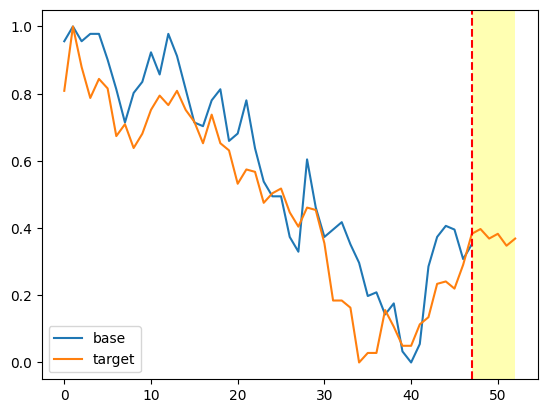

Date
2006-07-03    0.003317
2006-07-04   -0.006612
2006-07-05    0.003328
2006-07-06   -0.008292
2006-07-07    0.005017
Name: Change, dtype: float64

pred: -0.06484370392771721 % 


In [123]:
p.plot_pattern(1930)